                                                    Case: 

Usando bibliotecas cientificas em Python , crie um validador de CPF, em Jupyter Notebook, valide os números
de 0 a 10_000_000. Otimize seu código e mensure a diferença de velocidade. Tenha em mente o porquê das
suas decisões para a entrevista.

Entendendo a validação de CPF:

Para validar o CPF é necessário seguir os seguintes passos: 
        
        1. Precisamos calcular o primeiro dígito verificador, e para isso, iremos separar os primeiros 9 dígitos do CPF (xxx.xxx.xxx) e multiplicaremos cada um dos números, da direita para a esquerda por números crescentes a partir do número 2. 
        
        2. Em seguida somamos todo os valores e usaremos o resultado obtido para dividir por 11. Consideramos como quociente apenas o valor inteiro.
            2.1 Se o resto da divisão for menor que 2, então o dígito é igual a 0 (Zero).
            2.2 Se o resto da divisão for maior ou igual a 2, então o dígito verificador é igual a 11 menos o resto da divisão (11 - resto).
            
       3. Vamos calcular o segundo digito verificador, porém já utilizando o primeiro digito verificaro. Vamos montar a mesma tabela de multiplicação usada no cálculo do primeiro dígito. Só que desta vez usaremos os valores de 11 até 2 para fazer a multiplicação já que estamos incluindo mais um digito no cálculo(o primeiro dígito calculado).
        Utilizaremos a mesma lógica para o cáclulo do primeiro digito.
        3.1 Se o resto da divisão for menor que 2, então o dígito é igual a 0 (Zero).
        3.2 Se o resto da divisão for maior ou igual a 2, então o dígito verificador é igual a 11 menos o resto da divisão (11 - resto).


In [4]:
import numpy as np
import pandas as pd
import time

def validate_cpf(cpf):
    cpf = [int(d) for d in str(cpf) if d.isdigit()]
    if len(cpf) != 11:
        return False
    if len(set(cpf)) == 1:
        return False
    cpf_partial = cpf[:9]
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(10, 1, -1)))
    remainder = 11 - (sum_ % 11)
    if remainder > 9:
        check_digit = 0
    else:
        check_digit = remainder
    cpf_partial.append(check_digit)
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(11, 1, -1)))
    remainder = 11 - (sum_ % 11)
    if remainder > 9:
        check_digit = 0
    else:
        check_digit = remainder
    cpf_partial.append(check_digit)
    return cpf[-2:] == cpf_partial[-2:]

# Validando CPFs de 0 a 10 milhões
start_time = time.time()

cpf_list = np.arange(10_000_000)
validity = np.array([validate_cpf(cpf) for cpf in cpf_list])

end_time = time.time()
execution_time = end_time - start_time

print(f"Tempo de execução: {execution_time} segundos")

Tempo de execução: 14.651787757873535 segundos


In [10]:
validate_cpf('99995698102')

False

In [7]:
len(cpf_list)

10000000

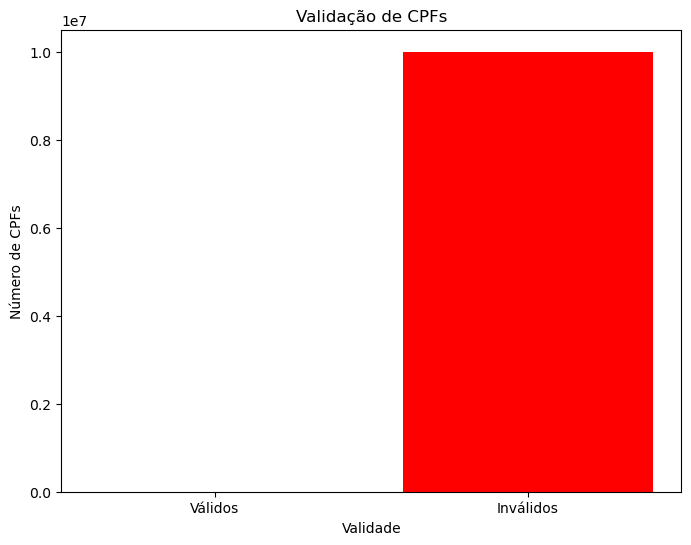

In [5]:
import matplotlib.pyplot as plt

# Contagem dos CPFs válidos e inválidos
valid_count = np.sum(validity)
invalid_count = len(validity) - valid_count

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Válidos', 'Inválidos'], [valid_count, invalid_count], color=['blue', 'red'])
plt.title('Validação de CPFs')
plt.xlabel('Validade')
plt.ylabel('Número de CPFs')
plt.show()

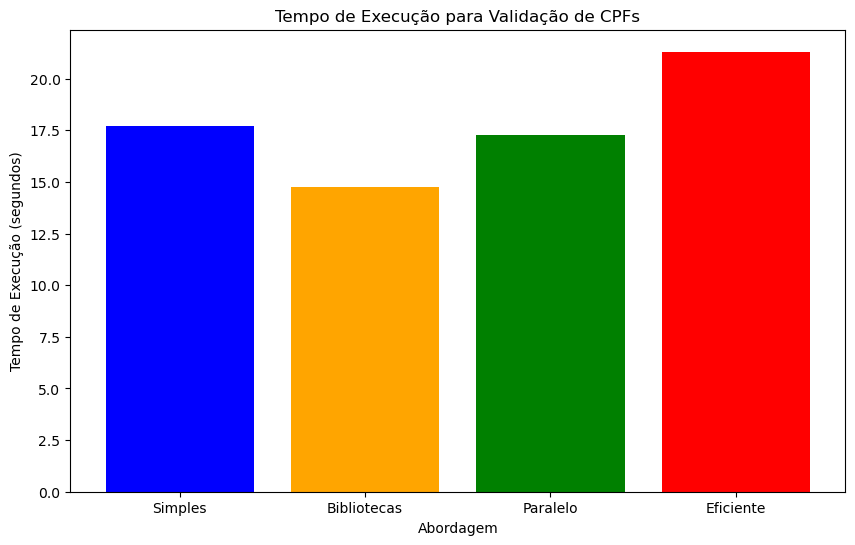

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool

# Função de validação de CPF simples
def validate_cpf_simple(cpf):
    cpf = [int(d) for d in str(cpf) if d.isdigit()]
    if len(cpf) != 11 or len(set(cpf)) == 1:
        return False
    cpf_partial = cpf[:9]
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(10, 1, -1)))
    remainder = 11 - (sum_ % 11)
    if remainder > 9:
        check_digit = 0
    else:
        check_digit = remainder
    cpf_partial.append(check_digit)
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(11, 1, -1)))
    remainder = 11 - (sum_ % 11)
    if remainder > 9:
        check_digit = 0
    else:
        check_digit = remainder
    cpf_partial.append(check_digit)
    return cpf[-2:] == cpf_partial[-2:]

# Função de validação de CPF usando bibliotecas
def validate_cpf_library(cpf):
    cpf = [int(d) for d in str(cpf) if d.isdigit()]
    if len(cpf) != 11 or len(set(cpf)) == 1:
        return False
    cpf_partial = cpf[:9]
    sum_ = np.sum(np.array(cpf_partial) * np.array(range(10, 1, -1)))
    remainder = 11 - (sum_ % 11)
    check_digit1 = 0 if remainder > 9 else remainder
    cpf_partial.append(check_digit1)
    sum_ = np.sum(np.array(cpf_partial) * np.array(range(11, 1, -1)))
    remainder = 11 - (sum_ % 11)
    check_digit2 = 0 if remainder > 9 else remainder
    cpf_partial.append(check_digit2)
    return cpf[-2:] == cpf_partial[-2:]

# Função de validação de CPF em paralelo
def validate_cpf_parallel(cpf):
    return validate_cpf_library(cpf)

# Função de validação de CPF usando estrutura de dados eficiente
def validate_cpf_efficient(cpf):
    cpf = set(int(d) for d in str(cpf) if d.isdigit())
    if len(cpf) != 11 or len(cpf) == 1:
        return False
    cpf_partial = list(cpf)[:9]
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(10, 1, -1)))
    remainder = 11 - (sum_ % 11)
    check_digit1 = 0 if remainder > 9 else remainder
    cpf_partial.append(check_digit1)
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(11, 1, -1)))
    remainder = 11 - (sum_ % 11)
    check_digit2 = 0 if remainder > 9 else remainder
    cpf_partial.append(check_digit2)
    return cpf == set(cpf_partial)

# Gerando lista de CPFs de 0 a 10 milhões
cpf_list = np.arange(10_000_000)

# Medindo o tempo de execução para cada abordagem
start_time_simple = time.time()
validity_simple = np.array([validate_cpf_simple(cpf) for cpf in cpf_list])
end_time_simple = time.time()
execution_time_simple = end_time_simple - start_time_simple

start_time_library = time.time()
validity_library = np.array([validate_cpf_library(cpf) for cpf in cpf_list])
end_time_library = time.time()
execution_time_library = end_time_library - start_time_library

start_time_parallel = time.time()
with Pool() as pool:
    validity_parallel = np.array(pool.map(validate_cpf_parallel, cpf_list))
end_time_parallel = time.time()
execution_time_parallel = end_time_parallel - start_time_parallel

start_time_efficient = time.time()
validity_efficient = np.array([validate_cpf_efficient(cpf) for cpf in cpf_list])
end_time_efficient = time.time()
execution_time_efficient = end_time_efficient - start_time_efficient

# Gerando o gráfico de comparação
labels = ['Simples', 'Bibliotecas', 'Paralelo', 'Eficiente']
times = [execution_time_simple, execution_time_library, execution_time_parallel, execution_time_efficient]

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'orange', 'green', 'red'])
plt.title('Tempo de Execução para Validação de CPFs')
plt.xlabel('Abordagem')
plt.ylabel('Tempo de Execução (segundos)')
plt.show()